In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_coil_dense = pd.read_csv('COIL_com_dense.csv')
df_coil_dense["type"] = "Dense"

In [50]:
df_coil_dense[["B_coil_norm","Pi_coil_norm", "Gamma_coil_norm", "coil_time"]].mean(axis=0)

B_coil_norm           2.929007
Pi_coil_norm         20.929178
Gamma_coil_norm      20.789580
coil_time          1023.064453
dtype: float64

In [4]:
df_coil_sparse = pd.read_csv('COIL_com_sparse.csv')
df_coil_sparse["type"] = "Sparse"

In [51]:
df_coil_sparse[["B_coil_norm","Pi_coil_norm", "Gamma_coil_norm", "coil_time"]].mean(axis=0)

B_coil_norm           2.744846
Pi_coil_norm         20.929287
Gamma_coil_norm      20.789589
coil_time          1203.390966
dtype: float64

In [5]:
df_coil = pd.concat([df_coil_dense, df_coil_sparse], axis=0)

In [6]:
## print rows of df_coil with niter=150
df_coil[df_coil['niter'] == 150]

,seed,n,q,p,K,tau,rho,B_jml_norm,B_coil_norm,Pi_jml_norm,Pi_coil_norm,Gamma_jml_norm,Gamma_coil_norm,jml_time,coil_time,cvx_optimal,loss,niter,type
4,4,300,100,2,2,0.2,0.5,2437.358219,2.738942,1123.632616,20.156012,22.778373,21.989405,18649.588290,1284.646256,optimal,14340.152998,150,Sparse
9,9,300,100,2,2,0.2,0.5,6421.452587,2.417805,1457.393971,21.423987,21.255066,21.254530,33071.383791,1388.573243,optimal,14373.882471,150,Sparse
10,10,300,100,2,2,0.2,0.5,2189.993771,3.060975,1673.253458,20.473242,22.559219,22.556819,39650.818187,1174.193406,optimal,13854.876776,150,Sparse
26,26,300,100,2,2,0.2,0.5,3434.729370,2.178584,1348.185734,20.054711,23.044084,23.041822,35469.899759,1321.079058,optimal,14217.866238,150,Sparse
61,61,300,100,2,2,0.2,0.5,913.610808,2.658704,1231.654464,20.837055,20.427181,20.425000,24975.396298,963.766343,optimal,14387.615519,150,Sparse
63,63,300,100,2,2,0.2,0.5,2334.706628,2.285293,1590.269618,21.074635,19.775491,19.775429,37666.243378,281.357267,optimal,14310.628111,150,Sparse
72,72,300,100,2,2,0.2,0.5,3338.015306,2.951794,1455.231274,22.348352,16.457771,16.456908,27041.238852,917.354394,optimal,15455.373252,150,Sparse
81,81,300,100,2,2,0.2,0.5,2600.110426,2.245914,1616.776961,20.901796,20.209248,20.207475,42010.766014,19.711957,optimal,14693.967557,150,Sparse


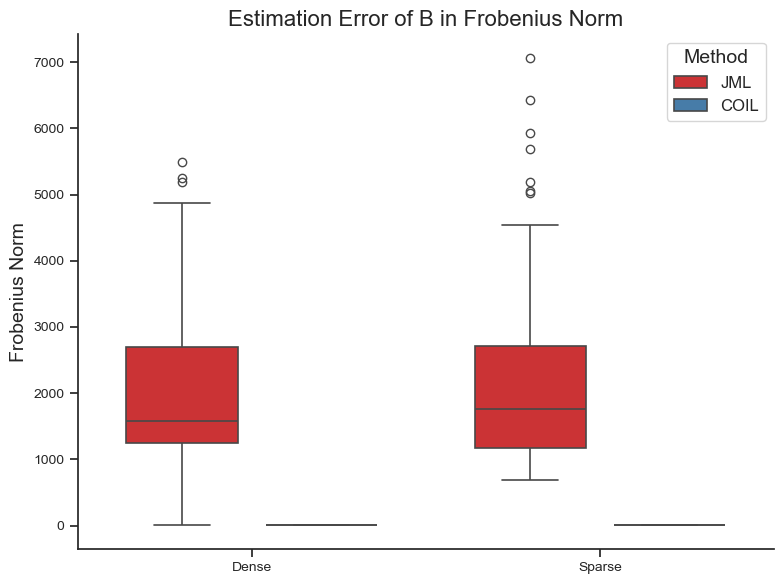

In [ ]:
df_B = df_coil[["B_jml_norm", "B_coil_norm", "type"]]
df_B.columns = ["JML", "COIL", "type"]
df_B = df_B.melt(id_vars=["type"], var_name="Method", value_name="value")

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,6))
ax = sns.boxplot(y="value", x="type", hue="Method", data=df_B, palette="Set1", linewidth=1.2,
                 gap=0.2)
                #  ["#FF7F0E", "#1F77B4"], dodge=True)
ax.set_title("Estimation Error of B in Frobenius Norm", fontsize=16)
ax.set_xlabel("", fontsize=14)
ax.set_ylabel("Frobenius Norm", fontsize=14)
ax.tick_params(axis='both', which='major',labelsize=12)
plt.legend(title="Method", fontsize=12, title_fontsize=14, loc = "best")

sns.despine()
plt.tight_layout()
plt.show()

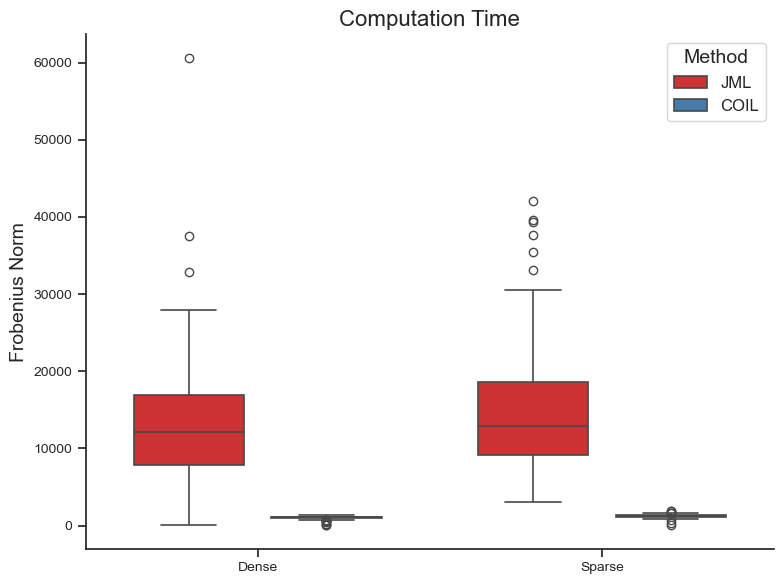

In [ ]:
df_time = df_coil[["jml_time", "coil_time", "type"]]
df_time.columns = ["JML", "COIL", "type"]
df_time = df_time.melt(id_vars=["type"], var_name="Method", value_name="value")

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,6))
ax = sns.boxplot(y="value", x="type", hue="Method", data=df_time, palette="Set1", linewidth=1.2,
                 gap=0.2)
                #  ["#FF7F0E", "#1F77B4"], dodge=True)
ax.set_title("Computation Time", fontsize=16)
ax.set_xlabel("", fontsize=14)
ax.set_ylabel("Frobenius Norm", fontsize=14)
ax.tick_params(axis='both', which='major',labelsize=12)
plt.legend(title="Method", fontsize=12, title_fontsize=14, loc = "best")

sns.despine()
plt.tight_layout()
plt.show()

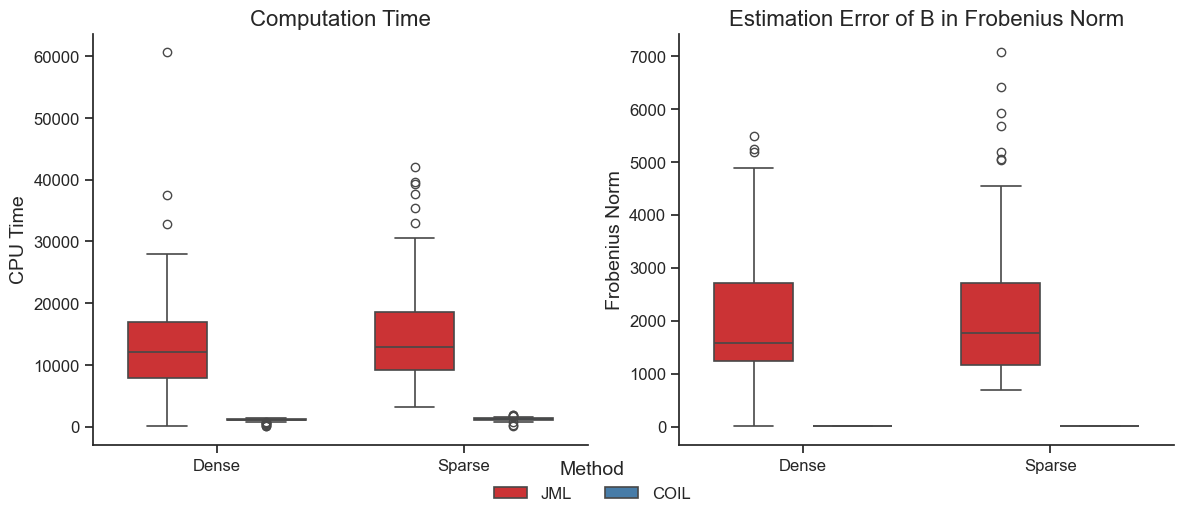

In [43]:
fig1, axs1 = plt.subplots(1, 2, figsize=(12, 5), sharey=False)
sns.boxplot(y="value", x="type", hue="Method", data=df_time, palette="Set1", linewidth=1.2,
            gap=0.2, ax=axs1[0])
axs1[0].set_title("Computation Time", fontsize=16)
axs1[0].set_xlabel("", fontsize=14)
axs1[0].set_ylabel("CPU Time", fontsize=14)
axs1[0].tick_params(axis='both', which='major',labelsize=12)
axs1[0].legend().remove()

sns.boxplot(y="value", x="type", hue="Method", data=df_B, palette="Set1", linewidth=1.2,
            gap=0.2, ax=axs1[1])
axs1[1].set_title("Estimation Error of B in Frobenius Norm", fontsize=16)
axs1[1].set_xlabel("", fontsize=14)
axs1[1].set_ylabel("Frobenius Norm", fontsize=14)
axs1[1].tick_params(axis='both', which='major',labelsize=12)
handles, labels = axs1[1].get_legend_handles_labels()
axs1[1].legend().remove()

fig1.legend(handles, labels, 
           title="Method", 
           fontsize=12, 
           title_fontsize=14, 
           loc = "lower center",
           bbox_to_anchor=(0.5, -0.05),
           ncol=len(labels),
           frameon=False)

plt.subplots_adjust(bottom=0.15)
sns.despine()
plt.tight_layout()
plt.savefig("Com_BTime.pdf", bbox_inches='tight')
plt.show()

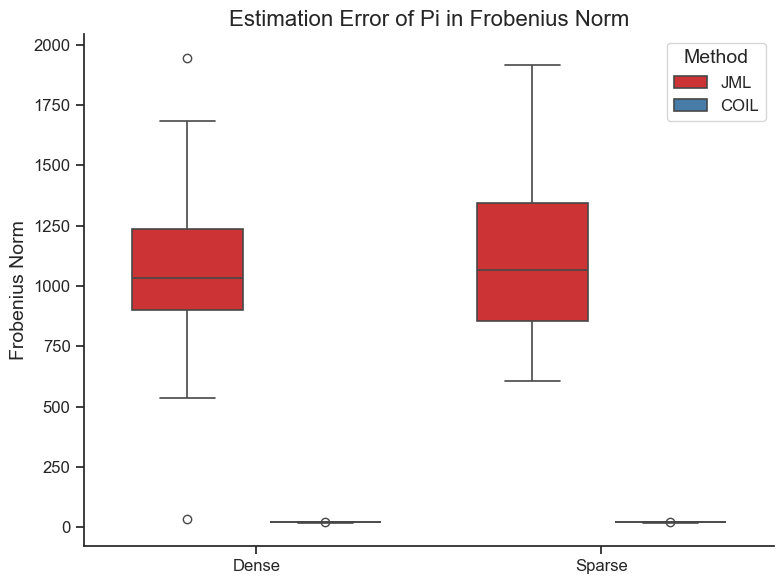

In [35]:
df_Pi = df_coil[["Pi_jml_norm", "Pi_coil_norm", "type"]]
df_Pi.columns = ["JML", "COIL", "type"]
df_Pi = df_Pi.melt(id_vars=["type"], var_name="Method", value_name="value")

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,6))
ax = sns.boxplot(y="value", x="type", hue="Method", data=df_Pi, palette="Set1", linewidth=1.2,
                 gap=0.2)
                #  ["#FF7F0E", "#1F77B4"], dodge=True)
ax.set_title("Estimation Error of Pi in Frobenius Norm", fontsize=16)
ax.set_xlabel("", fontsize=14)
ax.set_ylabel("Frobenius Norm", fontsize=14)
ax.tick_params(axis='both', which='major',labelsize=12)
plt.legend(title="Method", fontsize=12, title_fontsize=14, loc = "best")

sns.despine()
plt.tight_layout()
plt.show()

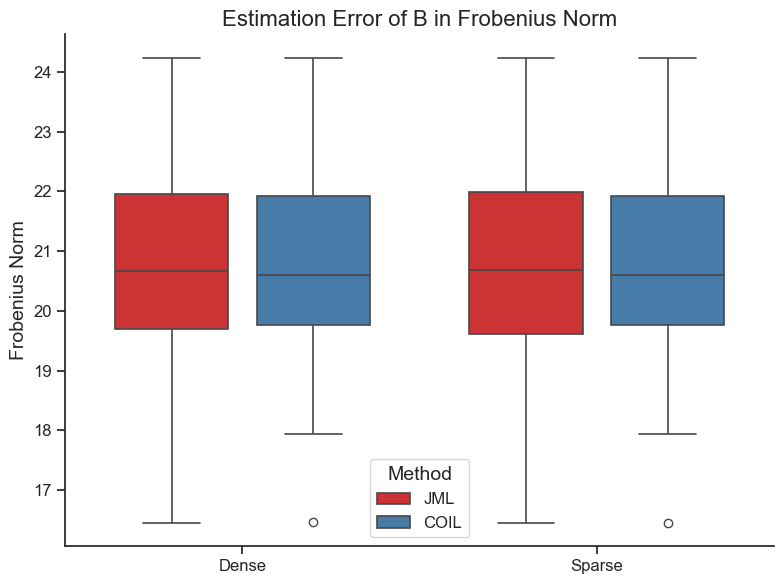

In [47]:
df_Gamma = df_coil[["Gamma_jml_norm", "Gamma_coil_norm", "type"]]
df_Gamma.columns = ["JML", "COIL", "type"]
df_Gamma = df_Gamma.melt(id_vars=["type"], var_name="Method", value_name="value")

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,6))
ax = sns.boxplot(y="value", x="type", hue="Method", data=df_Gamma, palette="Set1", linewidth=1.2,
                 gap=0.2)
                #  ["#FF7F0E", "#1F77B4"], dodge=True)
ax.set_title("Estimation Error of B in Frobenius Norm", fontsize=16)
ax.set_xlabel("", fontsize=14)
ax.set_ylabel("Frobenius Norm", fontsize=14)
ax.tick_params(axis='both', which='major',labelsize=12)
plt.legend(title="Method", fontsize=12, title_fontsize=14, loc = "best")

sns.despine()
plt.tight_layout()
plt.show()

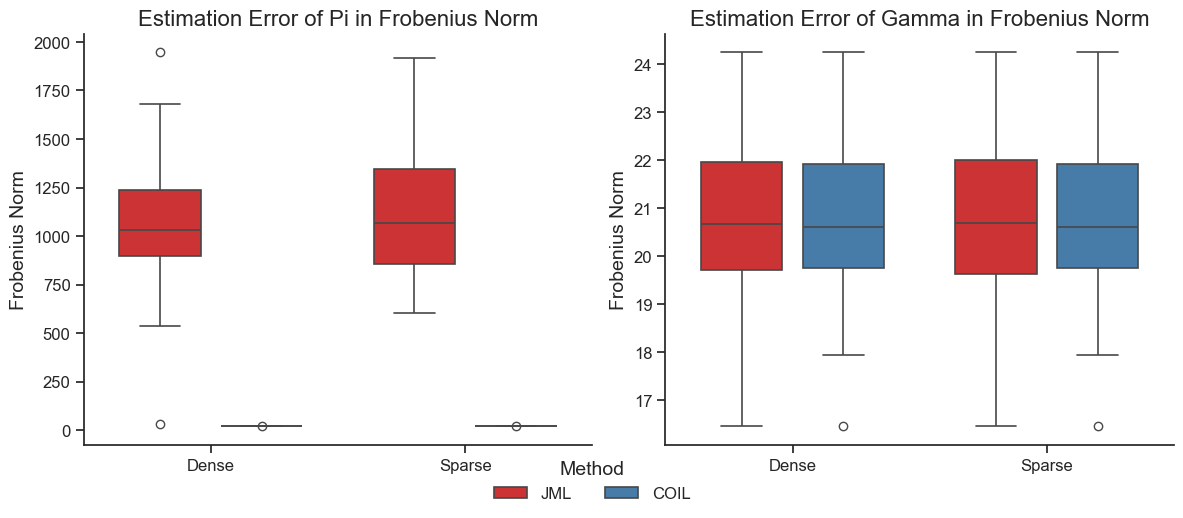

In [48]:
fig2, axs2 = plt.subplots(1, 2, figsize=(12, 5), sharey=False)
sns.boxplot(y="value", x="type", hue="Method", data=df_Pi, palette="Set1", linewidth=1.2,
            gap=0.2, ax=axs2[0])
axs2[0].set_title("Estimation Error of Pi in Frobenius Norm", fontsize=16)
axs2[0].set_xlabel("", fontsize=14)
axs2[0].set_ylabel("Frobenius Norm", fontsize=14)
axs2[0].tick_params(axis='both', which='major',labelsize=12)
axs2[0].legend().remove()

sns.boxplot(y="value", x="type", hue="Method", data=df_Gamma, palette="Set1", linewidth=1.2,
            gap=0.2, ax=axs2[1])
axs2[1].set_title("Estimation Error of Gamma in Frobenius Norm", fontsize=16)
axs2[1].set_xlabel("", fontsize=14)
axs2[1].set_ylabel("Frobenius Norm", fontsize=14)
axs2[1].tick_params(axis='both', which='major',labelsize=12)
handles, labels = axs2[1].get_legend_handles_labels()
axs2[1].legend().remove()

fig2.legend(handles, labels, 
           title="Method", 
           fontsize=12, 
           title_fontsize=14, 
           loc = "lower center",
           bbox_to_anchor=(0.5, -0.05),
           ncol=len(labels),
           frameon=False)

plt.subplots_adjust(bottom=0.15)
sns.despine()
plt.tight_layout()
plt.savefig("Com_PiGa.pdf", bbox_inches='tight')
plt.show()

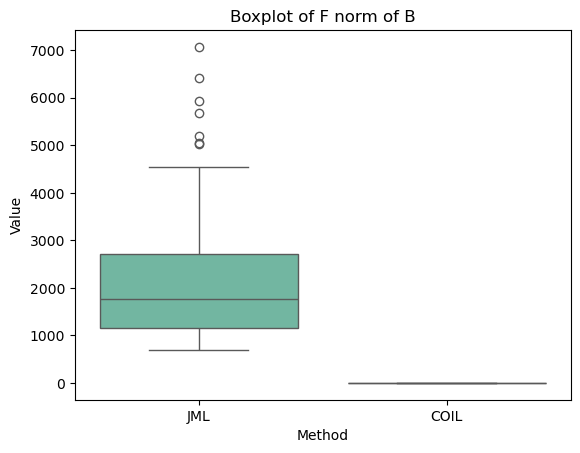

In [3]:
df_B = df_coil[["B_jml_norm", "B_coil_norm"]] 
df_B.columns = ['JML', 'COIL']
df_B_l = pd.melt(df_B, var_name='Method', value_name='Value')
sns.boxplot(x='Method', y='Value', data=df_B_l, palette="Set2", hue='Method')
plt.title('Boxplot of F norm of B')
plt.show()

In [7]:
# Find the index of the minimum value in Pi_jml_norm column
min_index = df_coil['Pi_jml_norm'].idxmin()

# Print the row with the smallest Pi_jml_norm
print(f"Row with smallest Pi_jml_norm (value: {df_coil.loc[min_index, 'Pi_jml_norm']}):")
print(df_coil.loc[min_index])

Row with smallest Pi_jml_norm (value: 34.49315024082791):
seed                         93
n                           300
q                           100
p                             2
K                             2
tau                         0.2
rho                         0.5
B_jml_norm             2.864244
B_coil_norm            3.028461
Pi_jml_norm            34.49315
Pi_coil_norm          21.146749
Gamma_jml_norm        19.280574
Gamma_coil_norm       20.012377
jml_time              41.308313
coil_time            1110.84696
cvx_optimal             optimal
loss               14466.486865
niter                        15
Name: 93, dtype: object


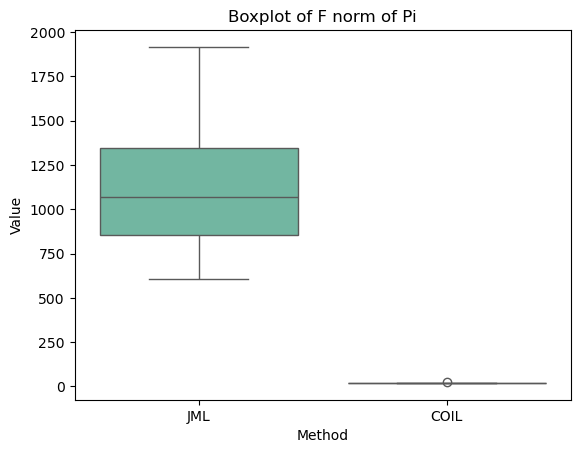

In [5]:
df_Pi = df_coil[["Pi_jml_norm", "Pi_coil_norm"]]
df_Pi.columns = ['JML', 'COIL']
df_Pi_l = pd.melt(df_Pi, var_name='Method', value_name='Value')
sns.boxplot(x='Method', y='Value', data=df_Pi_l, palette="Set2", hue='Method')
plt.title('Boxplot of F norm of Pi')
plt.show()

In [8]:
# Find the index of the minimum value in Pi_jml_norm column
min_index = df_coil['B_jml_norm'].idxmin()

# Print the row with the smallest Pi_jml_norm
print(f"Row with smallest Pi_jml_norm (value: {df_coil.loc[min_index, 'B_jml_norm']}):")
print(df_coil.loc[min_index])

Row with smallest Pi_jml_norm (value: 2.864244050525025):
seed                         93
n                           300
q                           100
p                             2
K                             2
tau                         0.2
rho                         0.5
B_jml_norm             2.864244
B_coil_norm            3.028461
Pi_jml_norm            34.49315
Pi_coil_norm          21.146749
Gamma_jml_norm        19.280574
Gamma_coil_norm       20.012377
jml_time              41.308313
coil_time            1110.84696
cvx_optimal             optimal
loss               14466.486865
niter                        15
Name: 93, dtype: object


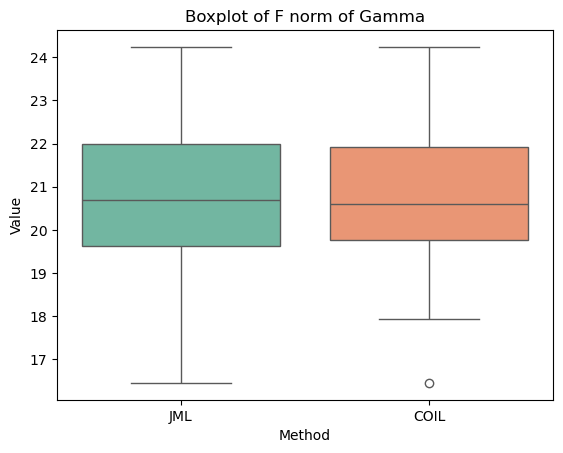

In [6]:
df_Gamma = df_coil[["Gamma_jml_norm", "Gamma_coil_norm"]]
df_Gamma.columns = ['JML', 'COIL']
df_Gamma_l = pd.melt(df_Gamma, var_name='Method', value_name='Value')
sns.boxplot(x='Method', y='Value', data=df_Gamma_l, palette="Set2", hue='Method')
plt.title('Boxplot of F norm of Gamma')
plt.show()

/var/folders/ml/jv5_hg4d2_gd4qrjyvfj1vl80000gn/T/ipykernel_34220/92308367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['JML'] = df_time.loc[:,'JML']/5


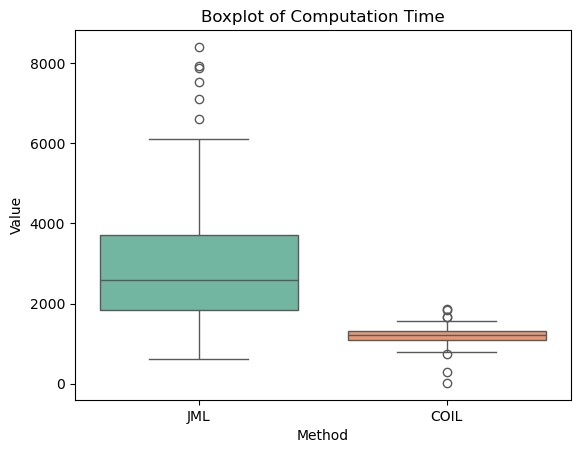

In [7]:
df_time = df_coil[["jml_time", "coil_time"]]
df_time.columns = ['JML', 'COIL']
df_time['JML'] = df_time.loc[:,'JML']/5
df_time_l = pd.melt(df_time, var_name='Method', value_name='Value')
sns.boxplot(x='Method', y='Value', data=df_time_l, palette="Set2", hue='Method')
plt.title('Boxplot of Computation Time')
plt.show()